In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import seaborn as sns
import xarray as xr
from numpy.linalg import inv
from numpy.linalg import pinv

In [2]:
# read in csv files

dataySurface = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Slope2000/LFyConstTop.csv')
datayBasal = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Slope2000/LFyConstBase.csv')
dataxSurface = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Slope2000/LFxConstTop.csv')
dataxBasal = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Slope2000/LFxConstBase.csv')

dataySurfaceHF = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Slope2000HigherFriction/HFyConstTop.csv')
datayBasalHF = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Slope2000HigherFriction/HFyConstBase.csv')
dataxSurfaceHF = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Slope2000HigherFriction/HFxConstTop.csv')
dataxBasalHF = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Slope2000HigherFriction/HFxConstBase.csv')

dataySurfaceHHF = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Slope2000EvenHigherFriction/HHFyConstTop.csv')
datayBasalHHF = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Slope2000EvenHigherFriction/HHFyConstBase.csv')
dataxSurfaceHHF = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Slope2000EvenHigherFriction/HHFxConstTop.csv')
dataxBasalHHF = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Slope2000EvenHigherFriction/HHFxConstBase.csv')



In [3]:
# make a column of rounded position points in order to get rid of duplicates within a tolerance

dataySurface['Rounded'] = round(dataySurface['Points:0'])
datayBasal['Rounded'] = round(datayBasal['Points:0'])
dataxSurface['Rounded'] = round(dataxSurface['Points:1'])
dataxBasal['Rounded'] = round(dataxBasal['Points:1'])

dataySurfaceHF['Rounded'] = round(dataySurfaceHF['Points:0'])
datayBasalHF['Rounded'] = round(datayBasalHF['Points:0'])
dataxSurfaceHF['Rounded'] = round(dataxSurfaceHF['Points:1'])
dataxBasalHF['Rounded'] = round(dataxBasalHF['Points:1'])

dataySurfaceHHF['Rounded'] = round(dataySurfaceHHF['Points:0'])
datayBasalHHF['Rounded'] = round(datayBasalHHF['Points:0'])
dataxSurfaceHHF['Rounded'] = round(dataxSurfaceHHF['Points:1'])
dataxBasalHHF['Rounded'] = round(dataxBasalHHF['Points:1'])


In [623]:
# sort values
dataySurface = dataySurface.sort_values('Points:0')
datayBasal = datayBasal.sort_values('Points:0')
dataxSurface = dataxSurface.sort_values('Points:1')
dataxBasal = dataxBasal.sort_values('Points:1')

dataySurfaceHF = dataySurfaceHF.sort_values('Points:0')
datayBasalHF = datayBasalHF.sort_values('Points:0')
dataxSurfaceHF = dataxSurfaceHF.sort_values('Points:1')
dataxBasalHF = dataxBasalHF.sort_values('Points:1')

dataySurfaceHHF = dataySurfaceHHF.sort_values('Points:0')
datayBasalHHF = datayBasalHHF.sort_values('Points:0')
dataxSurfaceHHF = dataxSurfaceHHF.sort_values('Points:1')
dataxBasalHHF = dataxBasalHHF.sort_values('Points:1')

In [624]:
# get rid of the duplicates

dataySurface.drop_duplicates(subset=['Rounded'], keep='first',inplace=True)
datayBasal.drop_duplicates(subset=['Rounded'], keep='first',inplace=True)
dataxSurface.drop_duplicates(subset=['Rounded'], keep='first',inplace=True)
dataxBasal.drop_duplicates(subset=['Rounded'], keep='first',inplace=True)

dataySurfaceHF.drop_duplicates(subset=['Rounded'], keep='first',inplace=True)
datayBasalHF.drop_duplicates(subset=['Rounded'], keep='first',inplace=True)
dataxSurfaceHF.drop_duplicates(subset=['Rounded'], keep='first',inplace=True)
dataxBasalHF.drop_duplicates(subset=['Rounded'], keep='first',inplace=True)

dataySurfaceHHF.drop_duplicates(subset=['Rounded'], keep='first',inplace=True)
datayBasalHHF.drop_duplicates(subset=['Rounded'], keep='first',inplace=True)
dataxSurfaceHHF.drop_duplicates(subset=['Rounded'], keep='first',inplace=True)
dataxBasalHHF.drop_duplicates(subset=['Rounded'], keep='first',inplace=True)


# remove row causing inconsistency issues 
dataySurfaceHF = dataySurfaceHF[dataySurfaceHF.Rounded != 45446.0]

In [625]:
# rename the basal velocity columns

datayBasal = datayBasal.rename(columns={'velocity:0': 'Vel0Basal', 'velocity:1': 'Vel1Basal', 'velocity:2': 'Vel2Basal'})
dataxBasal = dataxBasal.rename(columns={'velocity:0': 'Vel0Basal', 'velocity:1': 'Vel1Basal', 'velocity:2': 'Vel2Basal'})

datayBasalHF = datayBasalHF.rename(columns={'velocity:0': 'Vel0Basal', 'velocity:1': 'Vel1Basal', 'velocity:2': 'Vel2Basal'})
dataxBasalHF = dataxBasalHF.rename(columns={'velocity:0': 'Vel0Basal', 'velocity:1': 'Vel1Basal', 'velocity:2': 'Vel2Basal'})

datayBasalHHF = datayBasalHHF.rename(columns={'velocity:0': 'Vel0Basal', 'velocity:1': 'Vel1Basal', 'velocity:2': 'Vel2Basal'})
dataxBasalHHF = dataxBasalHHF.rename(columns={'velocity:0': 'Vel0Basal', 'velocity:1': 'Vel1Basal', 'velocity:2': 'Vel2Basal'})



In [626]:
# reorder the indices

dataySurface = dataySurface.reset_index(drop=True)
datayBasal = datayBasal.reset_index(drop=True)
dataxSurface = dataxSurface.reset_index(drop=True)
dataxBasal = dataxBasal.reset_index(drop=True)

dataySurfaceHF = dataySurfaceHF.reset_index(drop=True)
datayBasalHF = datayBasalHF.reset_index(drop=True)
dataxSurfaceHF = dataxSurfaceHF.reset_index(drop=True)
dataxBasalHF = dataxBasalHF.reset_index(drop=True)

dataySurfaceHHF = dataySurfaceHHF.reset_index(drop=True)
datayBasalHHF = datayBasalHHF.reset_index(drop=True)
dataxSurfaceHHF = dataxSurfaceHHF.reset_index(drop=True)
dataxBasalHHF = dataxBasalHHF.reset_index(drop=True)



In [627]:
# Concatenate dataframes
for i in [0,1,2]:
    dataySurface = pd.concat([dataySurface, datayBasal['Vel'+ str(i) + 'Basal']], axis=1)
    dataxSurface = pd.concat([dataxSurface, dataxBasal['Vel'+ str(i) + 'Basal']], axis=1)

for i in [0,1,2]:
    dataySurfaceHF = pd.concat([dataySurfaceHF, datayBasalHF['Vel'+ str(i) + 'Basal']], axis=1)
    dataxSurfaceHF = pd.concat([dataxSurfaceHF, dataxBasalHF['Vel'+ str(i) + 'Basal']], axis=1)    

for i in [0,1,2]:
    dataySurfaceHHF = pd.concat([dataySurfaceHHF, datayBasalHHF['Vel'+ str(i) + 'Basal']], axis=1)
    dataxSurfaceHHF = pd.concat([dataxSurfaceHHF, dataxBasalHHF['Vel'+ str(i) + 'Basal']], axis=1)       
    

In [628]:
# make an extra column to store SIA values

dataySurface['SIAvx'] = np.zeros(len(dataySurface.index))
dataxSurface['SIAvy'] = np.zeros(len(dataxSurface.index))
# make more columns to store SIA with SIA calculated basal velocities

dataySurface['BasalSIA'] = np.zeros(len(dataySurface.index))
dataxSurface['BasalSIA'] = np.zeros(len(dataxSurface.index))

# make columns to store the deformational 

dataySurface['VelDefSIA'] = np.zeros(len(dataySurface.index))
dataxSurface['VelDefSIA'] = np.zeros(len(dataxSurface.index))

# subtract the upper velocity from the basal velocity and place into a column

dataySurface['VelDefStokes'] = dataySurface['velocity:0'] - dataySurface['Vel0Basal']
dataxSurface['VelDefStokes'] = dataxSurface['velocity:1'] - dataxSurface['Vel1Basal']

# Higher friction

# make more columns to store SIA with SIA calculated basal velocities

dataySurfaceHF['SIAvx'] = np.zeros(len(dataySurfaceHF.index))
dataxSurfaceHF['SIAvy'] = np.zeros(len(dataxSurfaceHF.index))

# make more columns to store SIA with SIA calculated basal velocities

dataySurfaceHF['BasalSIA'] = np.zeros(len(dataySurfaceHF.index))
dataxSurfaceHF['BasalSIA'] = np.zeros(len(dataxSurfaceHF.index))

# make columns to store the deformational 

dataySurfaceHF['VelDefSIA'] = np.zeros(len(dataySurfaceHF.index))
dataxSurfaceHF['VelDefSIA'] = np.zeros(len(dataxSurfaceHF.index))

# subtract the upper velocity from the basal velocity and place into a column

dataySurfaceHF['VelDefStokes'] = dataySurfaceHF['velocity:0'] - dataySurfaceHF['Vel0Basal']
dataxSurfaceHF['VelDefStokes'] = dataxSurfaceHF['velocity:1'] - dataxSurfaceHF['Vel1Basal']

# Even higher friction

# make more columns to store SIA with SIA calculated basal velocities

dataySurfaceHHF['SIAvx'] = np.zeros(len(dataySurfaceHHF.index))
dataxSurfaceHHF['SIAvy'] = np.zeros(len(dataxSurfaceHHF.index))

# make more columns to store SIA with SIA calculated basal velocities

dataySurfaceHHF['BasalSIA'] = np.zeros(len(dataySurfaceHHF.index))
dataxSurfaceHHF['BasalSIA'] = np.zeros(len(dataxSurfaceHHF.index))

# make columns to store the deformational 

dataySurfaceHHF['VelDefSIA'] = np.zeros(len(dataySurfaceHHF.index))
dataxSurfaceHHF['VelDefSIA'] = np.zeros(len(dataxSurfaceHHF.index))

# subtract the upper velocity from the basal velocity and place into a column

dataySurfaceHHF['VelDefStokes'] = dataySurfaceHHF['velocity:0'] - dataySurfaceHHF['Vel0Basal']
dataxSurfaceHHF['VelDefStokes'] = dataxSurfaceHHF['velocity:1'] - dataxSurfaceHHF['Vel1Basal']


In [629]:
#  Calculate SIA: lower friction case

A, rho, g = 4.6e-25, 900.0, 9.81
p, q, n = 3, 1, 3 # 3.812*1e6 

for i in range(len(dataySurface)):
    gradDeformation = dataySurface.loc[i, 'freesurfgrad1'] * ( dataySurface.loc[i, 'freesurfgrad1']**2 + dataySurface.loc[i, 'freesurfgrad2']**2 )**((n-1.0)/2.0)
    gradSliding = dataySurface.loc[i, 'freesurfgrad1'] * ( dataySurface.loc[i, 'freesurfgrad1']**2 + dataySurface.loc[i, 'freesurfgrad2']**2 )**((p-1.0)/2.0)
    Cb = (((rho*g*dataySurface.loc[i, 'height'])**q) * 1.8e-20)
    dataySurface.loc[i, 'BasalSIA'] = -Cb*((rho*g*dataySurface.loc[i, 'height'])**(p-q))*gradSliding \
    - ((rho*g)**3.0)*(A/2)*(gradDeformation)*((dataySurface.loc[i, 'height'])**4.0)
    
for i in range(len(dataxSurface)):
    gradDeformation = dataxSurface.loc[i, 'freesurfgrad2'] * ( dataxSurface.loc[i, 'freesurfgrad1']**2 + dataxSurface.loc[i, 'freesurfgrad2']**2 )**((n-1.0)/2.0)
    gradSliding = dataxSurface.loc[i, 'freesurfgrad2'] * ( dataxSurface.loc[i, 'freesurfgrad1']**2 + dataxSurface.loc[i, 'freesurfgrad2']**2 )**((p-1.0)/2.0)
    Cb = (((rho*g*dataxSurface.loc[i, 'height'])**q) * 1.8e-20)
    dataxSurface.loc[i, 'BasalSIA'] = -Cb*((rho*g*dataxSurface.loc[i, 'height'])**(p-q))*gradSliding \
    - ((rho*g)**3.0)*(A/2)*(gradDeformation)*((dataxSurface.loc[i, 'height'])**4.0)
    
dataySurface['BasalSIA'] = dataySurface['BasalSIA'] * (365.25*24*60*60)
dataxSurface['BasalSIA'] = dataxSurface['BasalSIA'] * (365.25*24*60*60)


In [630]:
# Calculate SIA: higher friction case

A, rho, g = 4.6e-25, 900.0, 9.81
p, q, n = 3, 1, 3 
    
for i in range(len(dataySurfaceHF)):
    gradDeformation = dataySurfaceHF.loc[i, 'freesurfgrad1'] * ( dataySurfaceHF.loc[i, 'freesurfgrad1']**2 + dataySurfaceHF.loc[i, 'freesurfgrad2']**2 )**((n-1.0)/2.0)
    gradSliding = dataySurfaceHF.loc[i, 'freesurfgrad1'] * ( dataySurfaceHF.loc[i, 'freesurfgrad1']**2 + dataySurfaceHF.loc[i, 'freesurfgrad2']**2 )**((p-1.0)/2.0)
    Cb = (((rho*g*dataxSurfaceHF.loc[i, 'height'])**q) * 2.2e-21)
    dataySurfaceHF.loc[i, 'BasalSIA'] = - Cb *((rho*g*dataySurfaceHF.loc[i, 'height'])**(p-q))*gradSliding \
    - ((rho*g)**3.0)*(A/2)*(gradDeformation)*((dataySurfaceHF.loc[i, 'height'])**4.0)
    
    
for i in range(len(dataxSurfaceHF)):
    gradDeformation = dataxSurfaceHF.loc[i, 'freesurfgrad2'] * ( dataxSurfaceHF.loc[i, 'freesurfgrad1']**2 + dataxSurfaceHF.loc[i, 'freesurfgrad2']**2 )**((n-1.0)/2.0)
    gradSliding = dataxSurfaceHF.loc[i, 'freesurfgrad2'] * ( dataxSurfaceHF.loc[i, 'freesurfgrad1']**2 + dataxSurfaceHF.loc[i, 'freesurfgrad2']**2 )**((p-1.0)/2.0)
    Cb = (((rho*g*dataxSurfaceHF.loc[i, 'height'])**q) * 2.2e-21)
    dataxSurfaceHF.loc[i, 'BasalSIA'] = - Cb *((rho*g*dataxSurfaceHF.loc[i, 'height'])**(p-q))*gradSliding \
    - ((rho*g)**3.0)*(A/2)*(gradDeformation)*((dataxSurfaceHF.loc[i, 'height'])**4.0)
    
dataySurfaceHF['BasalSIA'] = dataySurfaceHF['BasalSIA'] * (365.25*24*60*60)
dataxSurfaceHF['BasalSIA'] = dataxSurfaceHF['BasalSIA'] * (365.25*24*60*60)


In [631]:
# Calculate SIA: even higher friction case

A, rho, g = 4.6e-25, 900.0, 9.81
p, q, n = 3, 1, 3
    
for i in range(len(dataySurfaceHHF)):
    gradDeformation = dataySurfaceHHF.loc[i, 'freesurfgrad1'] * ( dataySurfaceHHF.loc[i, 'freesurfgrad1']**2 + dataySurfaceHHF.loc[i, 'freesurfgrad2']**2 )**((n-1.0)/2.0)
    gradSliding = dataySurfaceHHF.loc[i, 'freesurfgrad1'] * ( dataySurfaceHHF.loc[i, 'freesurfgrad1']**2 + dataySurfaceHHF.loc[i, 'freesurfgrad2']**2 )**((p-1.0)/2.0)
    Cb = (((rho*g*dataxSurfaceHHF.loc[i, 'height'])**q) * 1.8e-26)
    dataySurfaceHHF.loc[i, 'BasalSIA'] = - Cb *((rho*g*dataySurfaceHHF.loc[i, 'height'])**(p-q))*gradSliding \
    - ((rho*g)**3.0)*(A/2)*(gradDeformation)*((dataySurfaceHHF.loc[i, 'height'])**4.0)
    
    
for i in range(len(dataxSurfaceHHF)):
    gradDeformation = dataxSurfaceHHF.loc[i, 'freesurfgrad2'] * ( dataxSurfaceHHF.loc[i, 'freesurfgrad1']**2 + dataxSurfaceHHF.loc[i, 'freesurfgrad2']**2 )**((n-1.0)/2.0)
    gradSliding = dataxSurfaceHHF.loc[i, 'freesurfgrad2'] * ( dataxSurfaceHHF.loc[i, 'freesurfgrad1']**2 + dataxSurfaceHHF.loc[i, 'freesurfgrad2']**2 )**((p-1.0)/2.0)
    Cb = (((rho*g*dataxSurfaceHHF.loc[i, 'height'])**q) * 1.8e-26)
    dataxSurfaceHHF.loc[i, 'BasalSIA'] = - Cb *((rho*g*dataxSurfaceHHF.loc[i, 'height'])**(p-q))*gradSliding \
    - ((rho*g)**3.0)*(A/2)*(gradDeformation)*((dataxSurfaceHHF.loc[i, 'height'])**4.0)
    
dataySurfaceHHF['BasalSIA'] = dataySurfaceHHF['BasalSIA'] * (365.25*24*60*60)
dataxSurfaceHHF['BasalSIA'] = dataxSurfaceHHF['BasalSIA'] * (365.25*24*60*60)


In [632]:
(1/3.812e8)**3

1.8052665041458508e-26

In [633]:
# Calculate the deformational part of the velocities for the higher friction case

A, rho, g = 4.6e-25, 900.0, 9.81
p, q, n = 3, 1, 3 

for i in range(len(dataySurfaceHF)):
    gradDeformation = dataySurfaceHF.loc[i, 'freesurfgrad1'] * ( dataySurfaceHF.loc[i, 'freesurfgrad1']**2 + dataySurfaceHF.loc[i, 'freesurfgrad2']**2 )**((n-1.0)/2.0)
    dataySurfaceHF.loc[i, 'VelDefSIA'] = - ((rho*g)**3.0)*(A/2)*(gradDeformation)*((dataySurfaceHF.loc[i, 'height'])**4.0)
    
for i in range(len(dataxSurfaceHF)):
    gradDeformation = dataxSurfaceHF.loc[i, 'freesurfgrad2'] * ( dataxSurfaceHF.loc[i, 'freesurfgrad1']**2 + dataxSurfaceHF.loc[i, 'freesurfgrad2']**2 )**((n-1.0)/2.0)
    dataxSurfaceHF.loc[i, 'VelDefSIA'] = - ((rho*g)**3.0)*(A/2)*(gradDeformation)*((dataxSurfaceHF.loc[i, 'height'])**4.0)
    
dataySurfaceHF['VelDefSIA'] = dataySurfaceHF['VelDefSIA'] * (365.25*24*60*60)
dataxSurfaceHF['VelDefSIA'] = dataxSurfaceHF['VelDefSIA'] * (365.25*24*60*60)

dataySurfaceHF

,height,freesurfgrad1,freesurfgrad2,velocity:0,velocity:1,velocity:2,Points:0,Points:1,Points:2,Rounded,Vel0Basal,Vel1Basal,Vel2Basal,SIAvx,BasalSIA,VelDefSIA,VelDefStokes
0,441.529934,0.001716,-0.000007,46.278445,-0.037464,-1.117470,25000.000000,0.0,45.176469,25000.0,46.198025,-0.037680,-2.750700,0.0,-0.016057,-9.600304e-04,0.080420
1,443.335490,0.001725,-0.000006,44.374236,-0.028725,-1.119061,25111.535361,0.0,45.357758,25112.0,44.295019,-0.028885,-2.729108,0.0,-0.016454,-9.906648e-04,0.079217
2,451.259234,0.001688,-0.000056,36.711494,0.138447,-1.137630,25557.469333,0.0,46.179360,25557.0,36.639381,0.142003,-2.640351,0.0,-0.016053,-9.971279e-04,0.072113
3,460.790580,0.001646,-0.000073,27.313900,-0.111897,-1.155384,26132.245495,0.0,47.132770,26132.0,27.250855,-0.114643,-2.518424,0.0,-0.015630,-1.006125e-03,0.063046
4,464.991159,0.001613,0.000075,23.325919,0.114250,-1.166337,26400.533561,0.0,47.527321,26401.0,23.270228,0.111180,-2.442954,0.0,-0.015063,-9.823050e-04,0.055691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,59.290820,-0.000648,-0.000091,128.980991,0.049722,-1.285534,46606.294530,0.0,6.149299,46606.0,128.954941,0.049629,0.286146,0.0,0.000015,1.716376e-08,0.026050
119,59.217978,-0.000643,-0.000091,129.435394,0.050611,-1.285338,46616.172162,0.0,6.141844,46616.0,129.409721,0.050503,0.283223,0.0,0.000015,1.668511e-08,0.025673
120,59.132450,-0.000636,-0.000091,130.165460,0.046055,-1.284619,46632.643117,0.0,6.132953,46633.0,130.140028,0.045937,0.277963,0.0,0.000014,1.600807e-08,0.025433
121,57.224685,-0.000470,-0.000082,146.181008,-0.153035,-1.268451,46981.207151,0.0,5.935702,46981.0,146.160453,-0.153239,0.162552,0.0,0.000005,5.724055e-09,0.020555


In [634]:
# Calculate the deformational part of the velocities for the lower friction case

A, rho, g = 4.6e-25, 900.0, 9.81
p, q, n = 3, 1, 3 

for i in range(len(dataySurface)):
    gradDeformation = dataySurface.loc[i, 'freesurfgrad1'] * ( dataySurface.loc[i, 'freesurfgrad1']**2 + dataySurface.loc[i, 'freesurfgrad2']**2 )**((n-1.0)/2.0)
    dataySurface.loc[i, 'VelDefSIA'] = - ((rho*g)**3.0)*(A/2)*(gradDeformation)*((dataySurface.loc[i, 'height'])**4.0)
    
    
for i in range(len(dataxSurface)):
    gradDeformation = dataxSurface.loc[i, 'freesurfgrad2'] * ( dataxSurface.loc[i, 'freesurfgrad1']**2 + dataxSurface.loc[i, 'freesurfgrad2']**2 )**((n-1.0)/2.0)
    dataxSurface.loc[i, 'VelDefSIA'] = - ((rho*g)**3.0)*(A/2)*(gradDeformation)*((dataxSurface.loc[i, 'height'])**4.0)
    
dataySurface['VelDefSIA'] = dataySurface['VelDefSIA'] * (365.25*24*60*60)
dataxSurface['VelDefSIA'] = dataxSurface['VelDefSIA'] * (365.25*24*60*60)


In [657]:
# Calculate the deformational part of the velocities for the even higher friction case

A, rho, g = 4.6e-25, 900.0, 9.81
p, q, n = 3, 1, 3 

for i in range(len(dataySurfaceHHF)):
    gradDeformation = dataySurfaceHHF.loc[i, 'freesurfgrad1'] * ( dataySurfaceHHF.loc[i, 'freesurfgrad1']**2 + dataySurfaceHHF.loc[i, 'freesurfgrad2']**2 )**((n-1.0)/2.0)
    dataySurfaceHHF.loc[i, 'VelDefSIA'] = - ((rho*g)**3.0)*(A/2)*(gradDeformation)*((dataySurfaceHHF.loc[i, 'height'])**4.0)
    
for i in range(len(dataxSurfaceHHF)):
    gradDeformation = dataxSurfaceHHF.loc[i, 'freesurfgrad2'] * ( dataxSurfaceHHF.loc[i, 'freesurfgrad1']**2 + dataxSurfaceHHF.loc[i, 'freesurfgrad2']**2 )**((n-1.0)/2.0)
    dataxSurfaceHHF.loc[i, 'VelDefSIA'] = - ((rho*g)**3.0)*(A/2)*(gradDeformation)*((dataxSurfaceHHF.loc[i, 'height'])**4.0)
    
dataySurfaceHHF['VelDefSIA'] = dataySurfaceHHF['VelDefSIA'] * (365.25*24*60*60)
dataxSurfaceHHF['VelDefSIA'] = dataxSurfaceHHF['VelDefSIA'] * (365.25*24*60*60)


In [658]:
# Calculate top and bottom surfaces in the case of lower and higher friction

M = 500.0
b0 = -580.0
sigma = 8.0
x0 = 40.0

X = np.arange(0, 60, 0.1)
Z = []

for x in X:
    Z.append(b0 + M * np.exp((-((x-x0)**2.0)**2)/(2.0*sigma**4)))

BedrockGeometry = pd.DataFrame(list(zip(X, Z)), columns =['x', 'z'])    
    
# Load the geometry of upper and lower surfaces of ice rise and rumple of the longer steady state runs

dataUpper = pd.read_csv('/Users/clara.henry/OneDrive - bwedu/ElmerFiles/FilesForPaper/Slope2000/FullTop.csv')
dataUpper.drop_duplicates(subset=['Points:0','Points:1','Points:2'], keep='first',inplace=True)
dataLower = pd.read_csv('/Users/clara.henry/OneDrive - bwedu/ElmerFiles/FilesForPaper/Slope2000/FullBase.csv')
dataLower.drop_duplicates(subset=['Points:0','Points:1','Points:2'], keep='first',inplace=True)
dataUpperHF = pd.read_csv('/Users/clara.henry/OneDrive - bwedu/ElmerFiles/FilesForPaper/Slope2000HigherFriction/FullTop.csv')
dataUpperHF.drop_duplicates(subset=['Points:0','Points:1','Points:2'], keep='first',inplace=True)
dataLowerHF = pd.read_csv('/Users/clara.henry/OneDrive - bwedu/ElmerFiles/FilesForPaper/Slope2000HigherFriction/FullBase.csv')
dataLowerHF.drop_duplicates(subset=['Points:0','Points:1','Points:2'], keep='first',inplace=True)

# change from metres to kilometres
dataUpper['Points:0'] = dataUpper['Points:0']/1000.0
dataLower['Points:0'] = dataLower['Points:0']/1000.0
dataUpperHF['Points:0'] = dataUpperHF['Points:0']/1000.0
dataLowerHF['Points:0'] = dataLowerHF['Points:0']/1000.0

dataUpper = dataUpper.sort_values('Points:0')
dataLower = dataLower.sort_values('Points:0')
dataUpperHF = dataUpperHF.sort_values('Points:0')
dataLowerHF = dataLowerHF.sort_values('Points:0')


In [659]:
# store grounding line values

GLyBasal = []
GLxBasal = []
GLyBasalHF = []
GLxBasalHF = []
GLyBasalHHF = []
GLxBasalHHF = []

for i in range(len(datayBasal)):
    if datayBasal.loc[i, 'groundedmask'] == 0.0:
        GLyBasal.append(datayBasal.loc[i, 'Points:0'])

for i in range(len(dataxBasal)):
    if dataxBasal.loc[i, 'groundedmask'] == 0.0:
        GLxBasal.append(dataxBasal.loc[i, 'Points:1'])

for i in range(len(datayBasalHF)):
    if datayBasalHF.loc[i, 'groundedmask'] == 0.0:
        GLyBasalHF.append(datayBasalHF.loc[i, 'Points:0'])

for i in range(len(dataxBasalHF)):
    if dataxBasalHF.loc[i, 'groundedmask'] == 0.0:
        GLxBasalHF.append(dataxBasalHF.loc[i, 'Points:1'])
        
for i in range(len(datayBasalHHF)):
    if datayBasalHHF.loc[i, 'groundedmask'] == 0.0:
        GLyBasalHHF.append(datayBasalHHF.loc[i, 'Points:0'])

for i in range(len(dataxBasalHHF)):
    if dataxBasalHHF.loc[i, 'groundedmask'] == 0.0:
        GLxBasalHHF.append(dataxBasalHHF.loc[i, 'Points:1'])

# dataySurface.loc[i, 'freesurfgrad1']

GLxBasal.pop(2)
GLxBasalHF.pop(3)
GLxBasalHF.pop(2)
GLxBasalHF.pop(0)

-7481.54284652

In [660]:
GLyBasalHHF

[28633.515646900003, 46981.2059036]

In [661]:
GLxBasalHHF

[-8288.22925708, 8037.3245413]

(-750.0, 300.0)

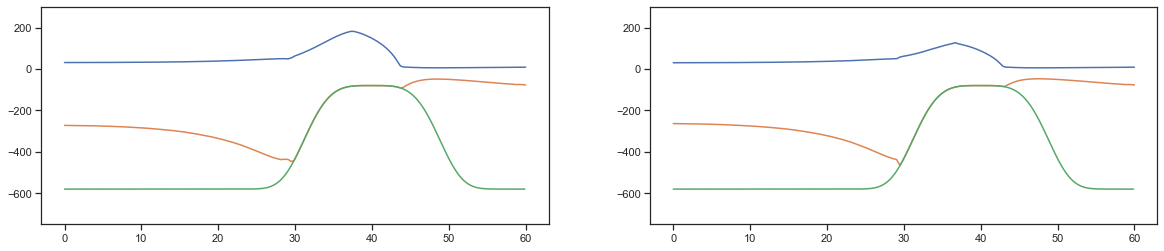

In [662]:
# ice rise geometry

sns.set_theme(style="ticks")
fig, ax = plt.subplots(1, 2, figsize=(20,4))

ax[0].plot(dataUpperHF['Points:0'], dataUpperHF['Points:2'])
ax[0].plot(dataLowerHF['Points:0'], dataLowerHF['Points:2'])
ax[0].plot(BedrockGeometry['x'], BedrockGeometry['z'])
ax[1].plot(dataUpper['Points:0'], dataUpper['Points:2'])
ax[1].plot(dataLower['Points:0'], dataLower['Points:2'])
ax[1].plot(BedrockGeometry['x'], BedrockGeometry['z'])

ax[1].set_ylim(-750, 300)
ax[0].set_ylim(-750, 300)

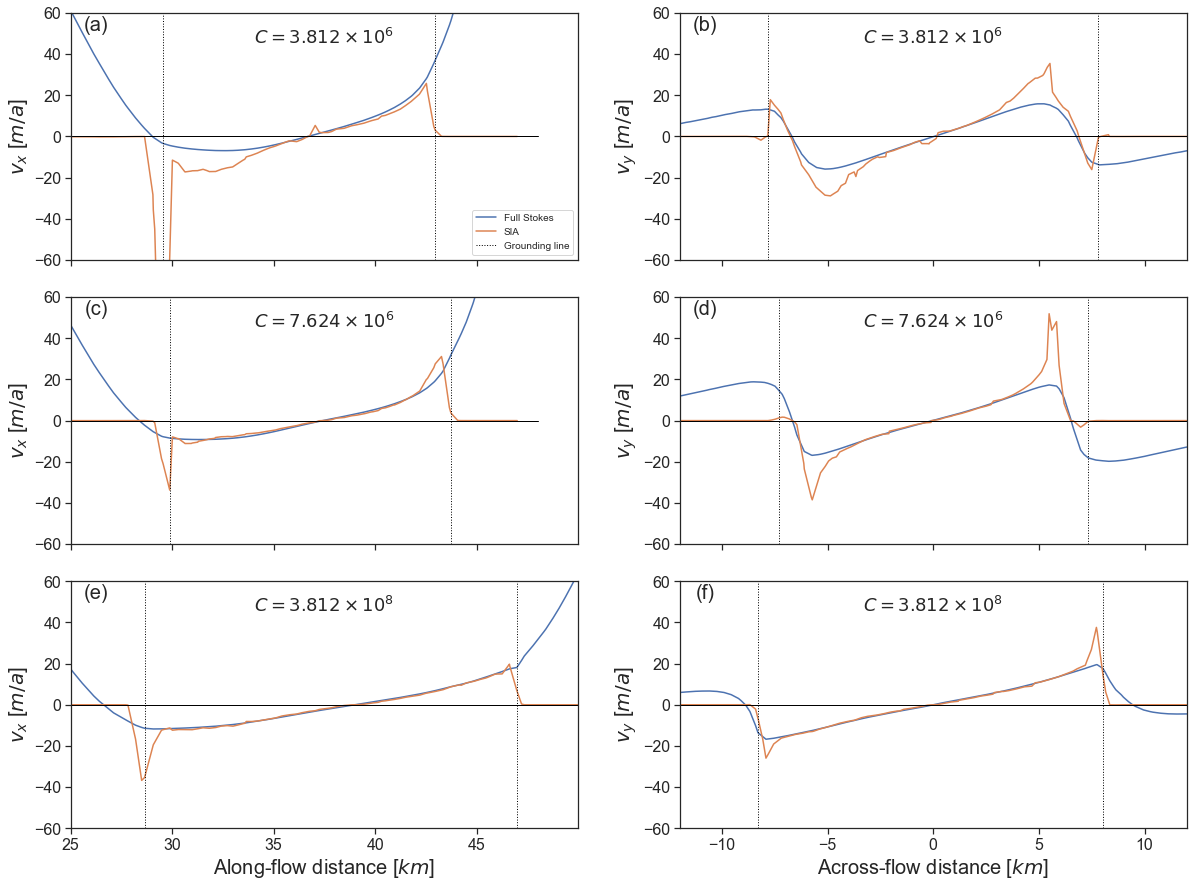

In [663]:
# full SIA velocity

sns.set_theme(style="ticks")
fig, ax = plt.subplots(3, 2, figsize=(20,15), sharex='col')

ax[0][0].plot(dataySurface['Points:0']/1000.0, dataySurface['velocity:0'], label="Full Stokes")
ax[0][0].plot(dataySurface['Points:0']/1000.0, dataySurface['BasalSIA'], label="SIA")
ax[1][0].plot(dataySurfaceHF['Points:0']/1000.0, dataySurfaceHF['velocity:0'], label="Full Stokes")
ax[1][0].plot(dataySurfaceHF['Points:0']/1000.0, dataySurfaceHF['BasalSIA'], label="SIA")
ax[2][0].plot(dataySurfaceHHF['Points:0']/1000.0, dataySurfaceHHF['velocity:0'], label="Full Stokes")
ax[2][0].plot(dataySurfaceHHF['Points:0']/1000.0, dataySurfaceHHF['BasalSIA'], label="SIA")

ax[0][1].plot(dataxSurface['Points:1']/1000.0, dataxSurface['velocity:1'], label="Full Stokes")
ax[0][1].plot(dataxSurface['Points:1']/1000.0, dataxSurface['BasalSIA'], label="SIA")
ax[1][1].plot(dataxSurfaceHF['Points:1']/1000.0, dataxSurfaceHF['velocity:1'], label="Full Stokes")
ax[1][1].plot(dataxSurfaceHF['Points:1']/1000.0, dataxSurfaceHF['BasalSIA'], label="SIA")
ax[2][1].plot(dataxSurfaceHHF['Points:1']/1000.0, dataxSurfaceHHF['velocity:1'], label="Full Stokes")
ax[2][1].plot(dataxSurfaceHHF['Points:1']/1000.0, dataxSurfaceHHF['BasalSIA'], label="SIA")

ax[0][0].plot([25, 48], [0, 0], '-', lw=1, color='black')
ax[0][1].plot([-12, 12], [0, 0], '-', lw=1, color='black')
ax[1][0].plot([25, 48], [0, 0], '-', lw=1, color='black')
ax[1][1].plot([-12, 12], [0, 0], '-', lw=1, color='black')
ax[2][0].plot([25, 50], [0, 0], '-', lw=1, color='black')
ax[2][1].plot([-12, 12], [0, 0], '-', lw=1, color='black')

ax[0][0].plot([GLyBasal[0]/1000.0, GLyBasal[0]/1000.0], [-60, 80], ':', lw=1, color='black', label='Grounding line')
ax[0][0].plot([GLyBasal[1]/1000.0, GLyBasal[1]/1000.0], [-60, 80], ':', lw=1, color='black')
        
for i in range(2):
    ax[0][1].plot([GLxBasal[i]/1000.0, GLxBasal[i]/1000.0], [-60, 80], ':', lw=1, color='black')
    ax[1][0].plot([GLyBasalHF[i]/1000.0, GLyBasalHF[i]/1000.0], [-60, 80], ':', lw=1, color='black')
    ax[1][1].plot([GLxBasalHF[i]/1000.0, GLxBasalHF[i]/1000.0], [-60, 80], ':', lw=1, color='black')
    ax[2][0].plot([GLyBasalHHF[i]/1000.0, GLyBasalHHF[i]/1000.0], [-60, 80], ':', lw=1, color='black')
    ax[2][1].plot([GLxBasalHHF[i]/1000.0, GLxBasalHHF[i]/1000.0], [-60, 80], ':', lw=1, color='black')

#ax[0][0].set_xlabel("Along-flow distance [$km$]", fontsize=20)
ax[2][0].set_xlabel("Along-flow distance [$km$]", fontsize=20)
ax[0][0].set_ylabel("$v_x$ [$m/a$]", fontsize=20)
ax[1][0].set_ylabel("$v_x$ [$m/a$]", fontsize=20)
ax[2][0].set_ylabel("$v_x$ [$m/a$]", fontsize=20)
#ax[0][1].set_xlabel("Across-flow distance [$km$]", fontsize=20)
ax[2][1].set_xlabel("Across-flow distance [$km$]", fontsize=20)
ax[0][1].set_ylabel("$v_y$ [$m/a$]", fontsize=20)
ax[1][1].set_ylabel("$v_y$ [$m/a$]", fontsize=20)
ax[2][1].set_ylabel("$v_y$ [$m/a$]", fontsize=20)

ax[0][0].set_xlim(25,47)
ax[0][1].set_xlim(-12,12)
ax[1][0].set_xlim(25,47)
ax[1][1].set_xlim(-12,12)
ax[2][0].set_xlim(25,50)
ax[2][1].set_xlim(-12,12)

ax[0][0].set_ylim(-60, 60)
ax[0][1].set_ylim(-60, 60)
ax[1][0].set_ylim(-60, 60)
ax[1][1].set_ylim(-60, 60)
ax[2][0].set_ylim(-60, 60)
ax[2][1].set_ylim(-60, 60)

ax[0][0].set_xticks(np.arange(25, 48, 5))
ax[1][0].set_xticks(np.arange(25, 48, 5))
ax[2][0].set_xticks(np.arange(25, 48, 5))
for i in range(3):
    for j in range(2):
        ax[i][j].tick_params(axis="both", labelsize=16)
        
ax[0][0].text(0.5, 0.9, r'$C = 3.812\times10^6$', size=18, horizontalalignment='center', verticalalignment='center', transform=ax[0][0].transAxes)
ax[0][1].text(0.5, 0.9, r'$C = 3.812\times10^6$', size=18, horizontalalignment='center', verticalalignment='center', transform=ax[0][1].transAxes)
ax[1][0].text(0.5, 0.9, r'$C = 7.624\times10^6$', size=18, horizontalalignment='center', verticalalignment='center', transform=ax[1][0].transAxes)
ax[1][1].text(0.5, 0.9, r'$C = 7.624\times10^6$', size=18, horizontalalignment='center', verticalalignment='center', transform=ax[1][1].transAxes)
ax[2][0].text(0.5, 0.9, r'$C = 3.812\times10^8$', size=18, horizontalalignment='center', verticalalignment='center', transform=ax[2][0].transAxes)
ax[2][1].text(0.5, 0.9, r'$C = 3.812\times10^8$', size=18, horizontalalignment='center', verticalalignment='center', transform=ax[2][1].transAxes)

ax[0][0].text(0.05, 0.95, '(a)', size=20, horizontalalignment='center', verticalalignment='center', transform=ax[0][0].transAxes)
ax[0][1].text(0.05, 0.95, '(b)', size=20, horizontalalignment='center', verticalalignment='center', transform=ax[0][1].transAxes)
ax[1][0].text(0.05, 0.95, '(c)', size=20, horizontalalignment='center', verticalalignment='center', transform=ax[1][0].transAxes)
ax[1][1].text(0.05, 0.95, '(d)', size=20, horizontalalignment='center', verticalalignment='center', transform=ax[1][1].transAxes)
ax[2][0].text(0.05, 0.95, '(e)', size=20, horizontalalignment='center', verticalalignment='center', transform=ax[2][0].transAxes)
ax[2][1].text(0.05, 0.95, '(f)', size=20, horizontalalignment='center', verticalalignment='center', transform=ax[2][1].transAxes)

ax[0][0].legend(fontsize='10', loc='lower right')
fig.subplots_adjust(hspace=0.15, wspace=0.2)
fig.savefig('FullSIA.jpg', format='jpg', dpi=700, bbox_inches = "tight")


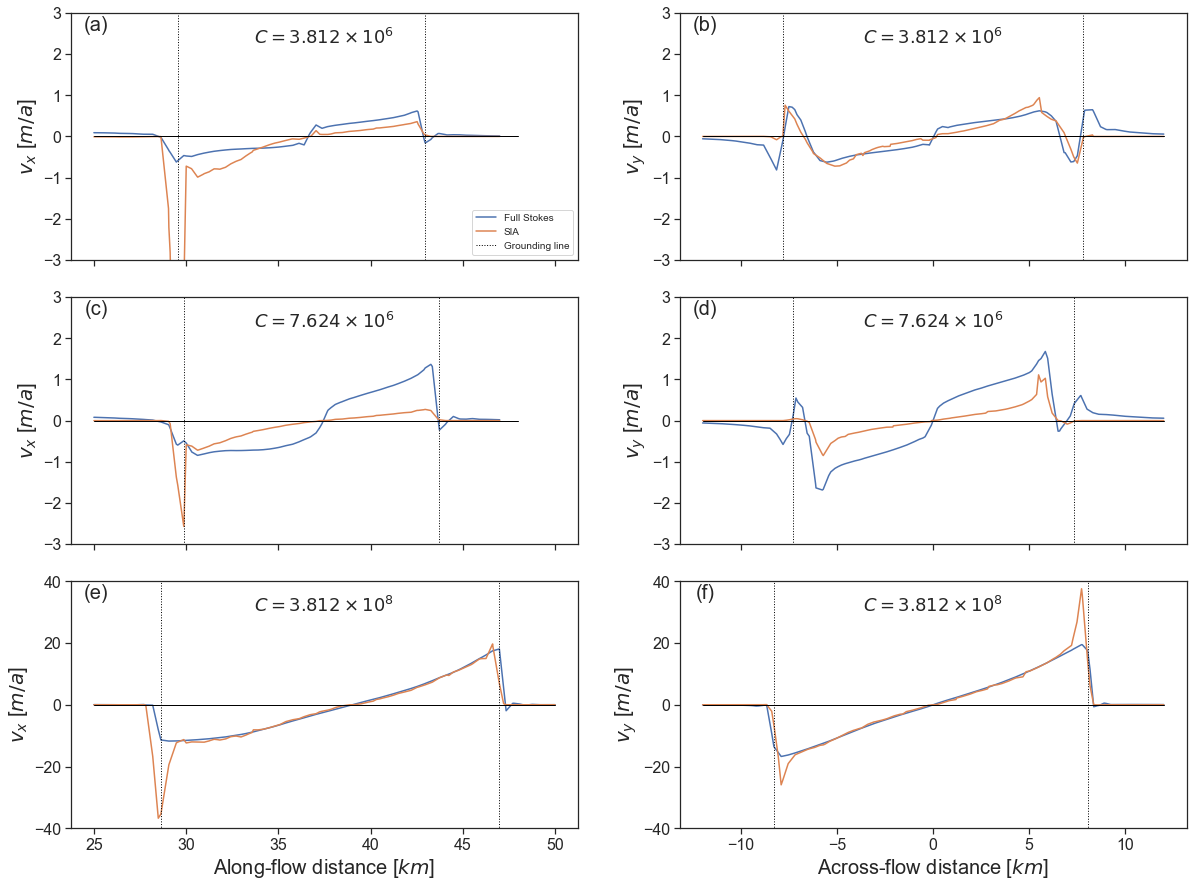

In [664]:
# deformational component of velocity

sns.set_theme(style="ticks")
fig, ax = plt.subplots(3, 2, figsize=(20,15), sharex='col')

ax[0][0].plot(dataySurface['Points:0']/1000.0, dataySurface['VelDefStokes'], label="Full Stokes")
ax[0][0].plot(dataySurface['Points:0']/1000.0, dataySurface['VelDefSIA'], label="SIA")
ax[1][0].plot(dataySurfaceHF['Points:0']/1000.0, dataySurfaceHF['VelDefStokes'], label="Full Stokes")
ax[1][0].plot(dataySurfaceHF['Points:0']/1000.0, dataySurfaceHF['VelDefSIA'], label="SIA")
ax[2][0].plot(dataySurfaceHHF['Points:0']/1000.0, dataySurfaceHHF['VelDefStokes'], label="Full Stokes")
ax[2][0].plot(dataySurfaceHHF['Points:0']/1000.0, dataySurfaceHHF['VelDefSIA'], label="SIA")

ax[0][1].plot(dataxSurface['Points:1']/1000.0, dataxSurface['VelDefStokes'], label="Full Stokes")
ax[0][1].plot(dataxSurface['Points:1']/1000.0, dataxSurface['VelDefSIA'], label="SIA")
ax[1][1].plot(dataxSurfaceHF['Points:1']/1000.0, dataxSurfaceHF['VelDefStokes'], label="Full Stokes")
ax[1][1].plot(dataxSurfaceHF['Points:1']/1000.0, dataxSurfaceHF['VelDefSIA'], label="SIA")
ax[2][1].plot(dataxSurfaceHHF['Points:1']/1000.0, dataxSurfaceHHF['VelDefStokes'], label="Full Stokes")
ax[2][1].plot(dataxSurfaceHHF['Points:1']/1000.0, dataxSurfaceHHF['VelDefSIA'], label="SIA")

ax[0][0].plot([25, 48], [0, 0], '-', lw=1, color='black')
ax[0][1].plot([-12, 12], [0, 0], '-', lw=1, color='black')
ax[1][0].plot([25, 48], [0, 0], '-', lw=1, color='black')
ax[1][1].plot([-12, 12], [0, 0], '-', lw=1, color='black')
ax[2][0].plot([25, 50], [0, 0], '-', lw=1, color='black')
ax[2][1].plot([-12, 12], [0, 0], '-', lw=1, color='black')
    
ax[0][0].plot([GLyBasal[0]/1000.0, GLyBasal[0]/1000.0], [-5, 5], ':', lw=1, color='black', label='Grounding line')
ax[0][0].plot([GLyBasal[1]/1000.0, GLyBasal[1]/1000.0], [-5, 5], ':', lw=1, color='black')
        
for i in range(2):
    ax[0][1].plot([GLxBasal[i]/1000.0, GLxBasal[i]/1000.0], [-5, 5], ':', lw=1, color='black')
    ax[1][0].plot([GLyBasalHF[i]/1000.0, GLyBasalHF[i]/1000.0], [-5, 5], ':', lw=1, color='black')
    ax[1][1].plot([GLxBasalHF[i]/1000.0, GLxBasalHF[i]/1000.0], [-5, 5], ':', lw=1, color='black')
    ax[2][0].plot([GLyBasalHHF[i]/1000.0, GLyBasalHHF[i]/1000.0], [-50, 50], ':', lw=1, color='black')
    ax[2][1].plot([GLxBasalHHF[i]/1000.0, GLxBasalHHF[i]/1000.0], [-50, 50], ':', lw=1, color='black')

ax[2][0].set_xlabel("Along-flow distance [$km$]", fontsize=20)
ax[0][0].set_ylabel("$v_x$ [$m/a$]", fontsize=20)
ax[1][0].set_ylabel("$v_x$ [$m/a$]", fontsize=20)
ax[2][0].set_ylabel("$v_x$ [$m/a$]", fontsize=20)
ax[2][1].set_xlabel("Across-flow distance [$km$]", fontsize=20)
ax[0][1].set_ylabel("$v_y$ [$m/a$]", fontsize=20)
ax[1][1].set_ylabel("$v_y$ [$m/a$]", fontsize=20)
ax[2][1].set_ylabel("$v_y$ [$m/a$]", fontsize=20)

ax[0][0].set_ylim(-3, 3)
ax[0][1].set_ylim(-3, 3)
ax[1][0].set_ylim(-3, 3)
ax[1][1].set_ylim(-3, 3)
ax[2][0].set_ylim(-40, 40)
ax[2][1].set_ylim(-40, 40)

for i in range(3):
    for j in range(2):
        ax[i][j].tick_params(axis="both", labelsize=16)

ax[0][0].text(0.5, 0.9, r'$C = 3.812\times10^6$', size=18, horizontalalignment='center', verticalalignment='center', transform=ax[0][0].transAxes)
ax[0][1].text(0.5, 0.9, r'$C = 3.812\times10^6$', size=18, horizontalalignment='center', verticalalignment='center', transform=ax[0][1].transAxes)        
ax[1][0].text(0.5, 0.9, r'$C = 7.624\times10^6$', size=18, horizontalalignment='center', verticalalignment='center', transform=ax[1][0].transAxes)
ax[1][1].text(0.5, 0.9, r'$C = 7.624\times10^6$', size=18, horizontalalignment='center', verticalalignment='center', transform=ax[1][1].transAxes)
ax[2][0].text(0.5, 0.9, r'$C = 3.812\times10^8$', size=18, horizontalalignment='center', verticalalignment='center', transform=ax[2][0].transAxes)
ax[2][1].text(0.5, 0.9, r'$C = 3.812\times10^8$', size=18, horizontalalignment='center', verticalalignment='center', transform=ax[2][1].transAxes)

ax[0][0].text(0.05, 0.95, '(a)', size=20, horizontalalignment='center', verticalalignment='center', transform=ax[0][0].transAxes)
ax[0][1].text(0.05, 0.95, '(b)', size=20, horizontalalignment='center', verticalalignment='center', transform=ax[0][1].transAxes)
ax[1][0].text(0.05, 0.95, '(c)', size=20, horizontalalignment='center', verticalalignment='center', transform=ax[1][0].transAxes)
ax[1][1].text(0.05, 0.95, '(d)', size=20, horizontalalignment='center', verticalalignment='center', transform=ax[1][1].transAxes)
ax[2][0].text(0.05, 0.95, '(e)', size=20, horizontalalignment='center', verticalalignment='center', transform=ax[2][0].transAxes)
ax[2][1].text(0.05, 0.95, '(f)', size=20, horizontalalignment='center', verticalalignment='center', transform=ax[2][1].transAxes)

ax[0][0].legend(fontsize='10', loc='lower right')
fig.subplots_adjust(hspace=0.15, wspace=0.2)
fig.savefig('DeformationalSIA.jpg', format='jpg', dpi=700, bbox_inches = "tight")


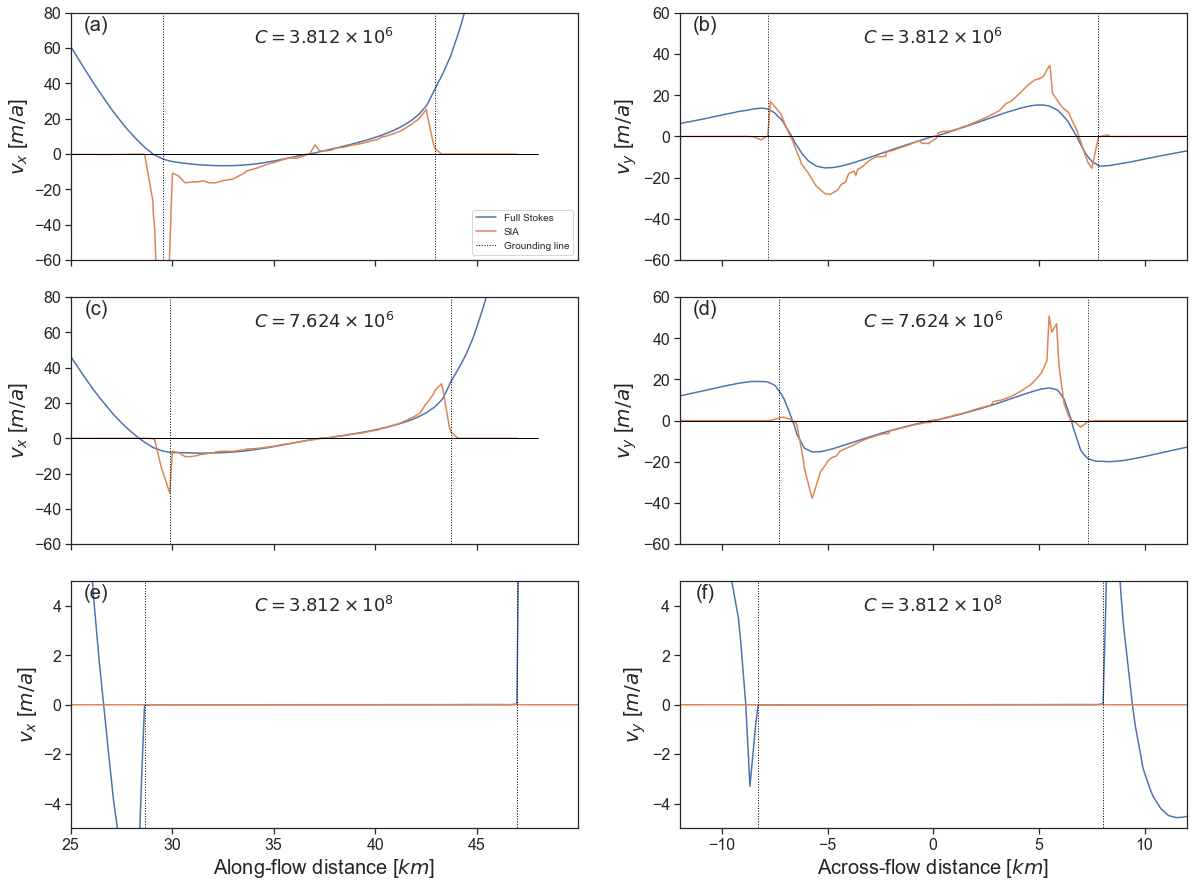

In [665]:
# basal sliding component of velocity

sns.set_theme(style="ticks")
fig, ax = plt.subplots(3, 2, figsize=(20,15), sharex='col')

ax[0][0].plot(dataySurface['Points:0']/1000.0, dataySurface['velocity:0'] - dataySurface['VelDefStokes'], label="Full Stokes")
ax[0][0].plot(dataySurface['Points:0']/1000.0, dataySurface['BasalSIA'] - dataySurface['VelDefSIA'], label="SIA")
ax[1][0].plot(dataySurfaceHF['Points:0']/1000.0, dataySurfaceHF['velocity:0'] - dataySurfaceHF['VelDefStokes'], label="Full Stokes")
ax[1][0].plot(dataySurfaceHF['Points:0']/1000.0, dataySurfaceHF['BasalSIA'] - dataySurfaceHF['VelDefSIA'], label="SIA")
ax[2][0].plot(dataySurfaceHHF['Points:0']/1000.0, dataySurfaceHHF['velocity:0'] - dataySurfaceHHF['VelDefStokes'], label="Full Stokes")
ax[2][0].plot(dataySurfaceHHF['Points:0']/1000.0, dataySurfaceHHF['BasalSIA'] - dataySurfaceHHF['VelDefSIA'], label="SIA")

ax[0][1].plot(dataxSurface['Points:1']/1000.0, dataxSurface['velocity:1'] - dataxSurface['VelDefStokes'], label="Full Stokes")
ax[0][1].plot(dataxSurface['Points:1']/1000.0, dataxSurface['BasalSIA'] - dataxSurface['VelDefSIA'], label="SIA")
ax[1][1].plot(dataxSurfaceHF['Points:1']/1000.0, dataxSurfaceHF['velocity:1'] - dataxSurfaceHF['VelDefStokes'], label="Full Stokes")
ax[1][1].plot(dataxSurfaceHF['Points:1']/1000.0, dataxSurfaceHF['BasalSIA'] - dataxSurfaceHF['VelDefSIA'], label="SIA")
ax[2][1].plot(dataxSurfaceHHF['Points:1']/1000.0, dataxSurfaceHHF['velocity:1'] - dataxSurfaceHHF['VelDefStokes'], label="Full Stokes")
ax[2][1].plot(dataxSurfaceHHF['Points:1']/1000.0, dataxSurfaceHHF['BasalSIA'] - dataxSurfaceHHF['VelDefSIA'], label="SIA")

ax[0][0].plot([25, 48], [0, 0], '-', lw=1, color='black')
ax[1][0].plot([25, 48], [0, 0], '-', lw=1, color='black')
ax[0][1].plot([-12, 12], [0, 0], '-', lw=1, color='black')
ax[1][1].plot([-12, 12], [0, 0], '-', lw=1, color='black')

ax[0][0].plot([GLyBasal[0]/1000.0, GLyBasal[0]/1000.0], [-60, 80], ':', lw=1, color='black', label='Grounding line')
ax[0][0].plot([GLyBasal[1]/1000.0, GLyBasal[1]/1000.0], [-60, 80], ':', lw=1, color='black')
        
for i in range(2):
    ax[0][1].plot([GLxBasal[i]/1000.0, GLxBasal[i]/1000.0], [-60, 80], ':', lw=1, color='black')
    ax[1][0].plot([GLyBasalHF[i]/1000.0, GLyBasalHF[i]/1000.0], [-60, 80], ':', lw=1, color='black')
    ax[1][1].plot([GLxBasalHF[i]/1000.0, GLxBasalHF[i]/1000.0], [-60, 80], ':', lw=1, color='black')
    ax[2][0].plot([GLyBasalHHF[i]/1000.0, GLyBasalHHF[i]/1000.0], [-60, 80], ':', lw=1, color='black')
    ax[2][1].plot([GLxBasalHHF[i]/1000.0, GLxBasalHHF[i]/1000.0], [-60, 80], ':', lw=1, color='black')

ax[2][0].set_xlabel("Along-flow distance [$km$]", fontsize=20)
ax[0][0].set_ylabel("$v_x$ [$m/a$]", fontsize=20)
ax[1][0].set_ylabel("$v_x$ [$m/a$]", fontsize=20)
ax[2][0].set_ylabel("$v_x$ [$m/a$]", fontsize=20)
ax[2][1].set_xlabel("Across-flow distance [$km$]", fontsize=20)
ax[0][1].set_ylabel("$v_y$ [$m/a$]", fontsize=20)    
ax[1][1].set_ylabel("$v_y$ [$m/a$]", fontsize=20)
ax[2][1].set_ylabel("$v_y$ [$m/a$]", fontsize=20)
    
ax[0][0].set_xlim(25,47)
ax[0][1].set_xlim(-12,12)
ax[1][0].set_xlim(25,47)
ax[1][1].set_xlim(-12,12)
ax[2][0].set_xlim(25,50)
ax[2][1].set_xlim(-12,12)

ax[0][0].set_ylim(-60, 80)
ax[0][1].set_ylim(-60, 60)
ax[1][0].set_ylim(-60, 80)
ax[1][1].set_ylim(-60, 60)
ax[2][0].set_ylim(-5, 5)
ax[2][1].set_ylim(-5, 5)

ax[0][0].set_xticks(np.arange(25, 48, 5))
ax[1][0].set_xticks(np.arange(25, 48, 5))
for i in range(3):
    for j in range(2):
        ax[i][j].tick_params(axis="both", labelsize=16)

ax[0][0].text(0.5, 0.9, r'$C = 3.812\times10^6$', size=18, horizontalalignment='center', verticalalignment='center', transform=ax[0][0].transAxes)
ax[0][1].text(0.5, 0.9, r'$C = 3.812\times10^6$', size=18, horizontalalignment='center', verticalalignment='center', transform=ax[0][1].transAxes)
ax[1][0].text(0.5, 0.9, r'$C = 7.624\times10^6$', size=18, horizontalalignment='center', verticalalignment='center', transform=ax[1][0].transAxes)
ax[1][1].text(0.5, 0.9, r'$C = 7.624\times10^6$', size=18, horizontalalignment='center', verticalalignment='center', transform=ax[1][1].transAxes)
ax[2][0].text(0.5, 0.9, r'$C = 3.812\times10^8$', size=18, horizontalalignment='center', verticalalignment='center', transform=ax[2][0].transAxes)
ax[2][1].text(0.5, 0.9, r'$C = 3.812\times10^8$', size=18, horizontalalignment='center', verticalalignment='center', transform=ax[2][1].transAxes)

ax[0][0].text(0.05, 0.95, '(a)', size=20, horizontalalignment='center', verticalalignment='center', transform=ax[0][0].transAxes)
ax[0][1].text(0.05, 0.95, '(b)', size=20, horizontalalignment='center', verticalalignment='center', transform=ax[0][1].transAxes)
ax[1][0].text(0.05, 0.95, '(c)', size=20, horizontalalignment='center', verticalalignment='center', transform=ax[1][0].transAxes)
ax[1][1].text(0.05, 0.95, '(d)', size=20, horizontalalignment='center', verticalalignment='center', transform=ax[1][1].transAxes)
ax[2][0].text(0.05, 0.95, '(e)', size=20, horizontalalignment='center', verticalalignment='center', transform=ax[2][0].transAxes)
ax[2][1].text(0.05, 0.95, '(f)', size=20, horizontalalignment='center', verticalalignment='center', transform=ax[2][1].transAxes)   
    
ax[0][0].legend(fontsize='10', loc='lower right')
fig.subplots_adjust(hspace=0.15, wspace=0.2)    
fig.savefig('SlidingSIA.jpg', format='jpg', dpi=700, bbox_inches = "tight")


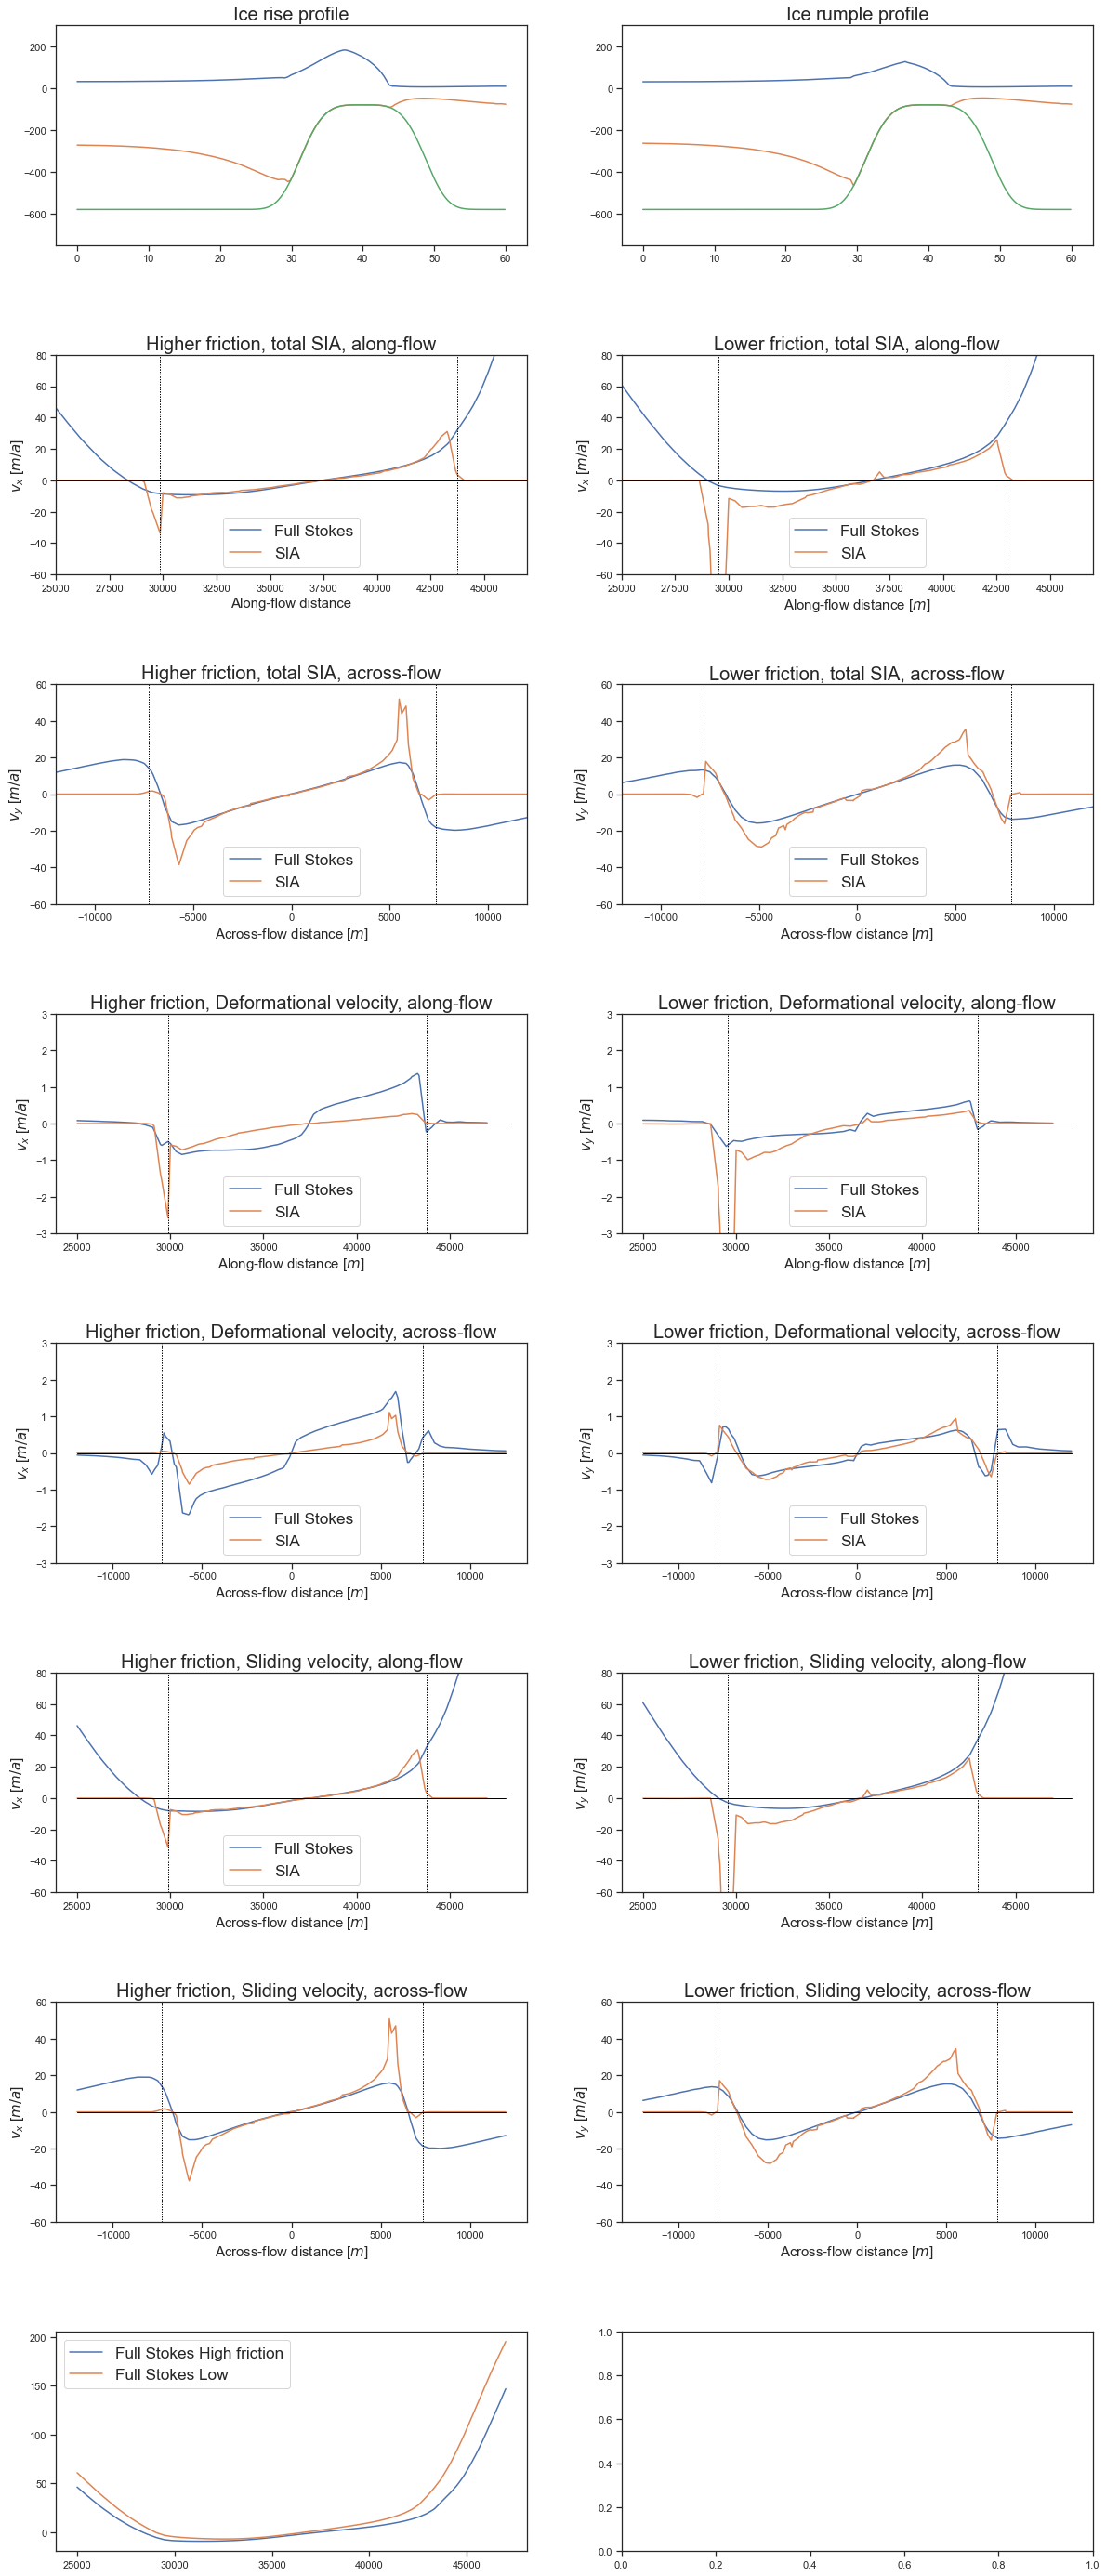

In [666]:
sns.set_theme(style="ticks")
fig, ax = plt.subplots(8, 2, figsize=(20,50))

ax[0][0].plot(dataUpperHF['Points:0'], dataUpperHF['Points:2'])
ax[0][0].plot(dataLowerHF['Points:0'], dataLowerHF['Points:2'])
ax[0][0].plot(BedrockGeometry['x'], BedrockGeometry['z'])
ax[0][1].plot(dataUpper['Points:0'], dataUpper['Points:2'])
ax[0][1].plot(dataLower['Points:0'], dataLower['Points:2'])
ax[0][1].plot(BedrockGeometry['x'], BedrockGeometry['z'])

ax[1][0].plot(dataySurfaceHF['Points:0'], dataySurfaceHF['velocity:0'], label="Full Stokes")
ax[1][0].plot(dataySurfaceHF['Points:0'], dataySurfaceHF['BasalSIA'], label="SIA")
ax[1][1].plot(dataySurface['Points:0'], dataySurface['velocity:0'], label="Full Stokes")
ax[1][1].plot(dataySurface['Points:0'], dataySurface['BasalSIA'], label="SIA")

ax[2][0].plot(dataxSurfaceHF['Points:1'], dataxSurfaceHF['velocity:1'], label="Full Stokes")
ax[2][0].plot(dataxSurfaceHF['Points:1'], dataxSurfaceHF['BasalSIA'], label="SIA")
ax[2][1].plot(dataxSurface['Points:1'], dataxSurface['velocity:1'], label="Full Stokes")
ax[2][1].plot(dataxSurface['Points:1'], dataxSurface['BasalSIA'], label="SIA")

ax[3][0].plot(dataySurfaceHF['Points:0'], dataySurfaceHF['VelDefStokes'], label="Full Stokes")
ax[3][0].plot(dataySurfaceHF['Points:0'], dataySurfaceHF['VelDefSIA'], label="SIA")
ax[3][1].plot(dataySurface['Points:0'], dataySurface['VelDefStokes'], label="Full Stokes")
ax[3][1].plot(dataySurface['Points:0'], dataySurface['VelDefSIA'], label="SIA")

ax[4][0].plot(dataxSurfaceHF['Points:1'], dataxSurfaceHF['VelDefStokes'], label="Full Stokes")
ax[4][0].plot(dataxSurfaceHF['Points:1'], dataxSurfaceHF['VelDefSIA'], label="SIA")
ax[4][1].plot(dataxSurface['Points:1'], dataxSurface['VelDefStokes'], label="Full Stokes")
ax[4][1].plot(dataxSurface['Points:1'], dataxSurface['VelDefSIA'], label="SIA")

ax[5][0].plot(dataySurfaceHF['Points:0'], dataySurfaceHF['velocity:0'] - dataySurfaceHF['VelDefStokes'], label="Full Stokes")
ax[5][0].plot(dataySurfaceHF['Points:0'], dataySurfaceHF['BasalSIA'] - dataySurfaceHF['VelDefSIA'], label="SIA")
ax[5][1].plot(dataySurface['Points:0'], dataySurface['velocity:0'] - dataySurface['VelDefStokes'], label="Full Stokes")
ax[5][1].plot(dataySurface['Points:0'], dataySurface['BasalSIA'] - dataySurface['VelDefSIA'], label="SIA")

ax[6][0].plot(dataxSurfaceHF['Points:1'], dataxSurfaceHF['velocity:1'] - dataxSurfaceHF['VelDefStokes'], label="Full Stokes")
ax[6][0].plot(dataxSurfaceHF['Points:1'], dataxSurfaceHF['BasalSIA'] - dataxSurfaceHF['VelDefSIA'], label="SIA")
ax[6][1].plot(dataxSurface['Points:1'], dataxSurface['velocity:1'] - dataxSurface['VelDefStokes'], label="Full Stokes")
ax[6][1].plot(dataxSurface['Points:1'], dataxSurface['BasalSIA'] - dataxSurface['VelDefSIA'], label="SIA")

# add in lines for zero velocity

for i in range(1, 7, 2):
    ax[i][0].plot([25000, 48000], [0, 0], '-', lw=1, color='black')
    ax[i][1].plot([25000, 48000], [0, 0], '-', lw=1, color='black')
    
for i in range(2, 7, 2):
    ax[i][0].plot([-12000, 12000], [0, 0], '-', lw=1, color='black')
    ax[i][1].plot([-12000, 12000], [0, 0], '-', lw=1, color='black')

for i in range(len(GLyBasalHF)):
    for k in range(1, 7, 4):
        ax[k][0].plot([GLyBasalHF[i], GLyBasalHF[i]], [-60, 80], ':', lw=1, color='black')
        ax[k][0].plot([GLyBasalHF[i], GLyBasalHF[i]], [-60, 80], ':', lw=1, color='black')
    ax[3][0].plot([GLyBasalHF[i], GLyBasalHF[i]], [-5, 5], ':', lw=1, color='black')
    ax[3][0].plot([GLyBasalHF[i], GLyBasalHF[i]], [-5, 5], ':', lw=1, color='black')
    
for i in range(len(GLyBasal)):
    for k in range(1, 7, 4):
        ax[k][1].plot([GLyBasal[i], GLyBasal[i]], [-60, 80], ':', lw=1, color='black')
        ax[k][1].plot([GLyBasal[i], GLyBasal[i]], [-60, 80], ':', lw=1, color='black')
    ax[3][1].plot([GLyBasal[i], GLyBasal[i]], [-5, 5], ':', lw=1, color='black')
    ax[3][1].plot([GLyBasal[i], GLyBasal[i]], [-5, 5], ':', lw=1, color='black')
    
for i in range(len(GLxBasalHF)):
    for k in range(2, 7, 4):
        ax[k][0].plot([GLxBasalHF[i], GLxBasalHF[i]], [-60, 80], ':', lw=1, color='black')
        ax[k][0].plot([GLxBasalHF[i], GLxBasalHF[i]], [-60, 80], ':', lw=1, color='black')
    ax[4][0].plot([GLxBasalHF[i], GLxBasalHF[i]], [-5, 5], ':', lw=1, color='black')
    ax[4][0].plot([GLxBasalHF[i], GLxBasalHF[i]], [-5, 5], ':', lw=1, color='black')
    
for i in range(len(GLxBasal)):
    for k in range(2, 7, 4):
        ax[k][1].plot([GLxBasal[i], GLxBasal[i]], [-60, 80], ':', lw=1, color='black')
        ax[k][1].plot([GLxBasal[i], GLxBasal[i]], [-60, 80], ':', lw=1, color='black')
    ax[4][1].plot([GLxBasal[i], GLxBasal[i]], [-5, 5], ':', lw=1, color='black')
    ax[4][1].plot([GLxBasal[i], GLxBasal[i]], [-5, 5], ':', lw=1, color='black')

ax[7][0].plot(dataySurfaceHF['Points:0'], dataySurfaceHF['velocity:0'], label="Full Stokes High friction")
ax[7][0].plot(dataySurface['Points:0'], dataySurface['velocity:0'], label="Full Stokes Low")

ax[1][0].legend(fontsize='x-large', title_fontsize='40')
ax[1][1].legend(fontsize='x-large', title_fontsize='40')
ax[2][0].legend(fontsize='x-large', title_fontsize='40')
ax[2][1].legend(fontsize='x-large', title_fontsize='40')
ax[3][0].legend(fontsize='x-large', title_fontsize='40')
ax[3][1].legend(fontsize='x-large', title_fontsize='40')
ax[4][0].legend(fontsize='x-large', title_fontsize='40')
ax[4][1].legend(fontsize='x-large', title_fontsize='40')
ax[5][0].legend(fontsize='x-large', title_fontsize='40')
ax[7][0].legend(fontsize='x-large', title_fontsize='40')

ax[0][0].set_title('Ice rise profile', fontsize=20)
ax[0][1].set_title('Ice rumple profile', fontsize=20)
ax[1][0].set_title('Higher friction, total SIA, along-flow', fontsize=20)
ax[1][1].set_title('Lower friction, total SIA, along-flow', fontsize=20)
ax[2][0].set_title('Higher friction, total SIA, across-flow', fontsize=20)
ax[2][1].set_title('Lower friction, total SIA, across-flow', fontsize=20)
ax[3][0].set_title('Higher friction, Deformational velocity, along-flow', fontsize=20)
ax[3][1].set_title('Lower friction, Deformational velocity, along-flow', fontsize=20)
ax[4][0].set_title('Higher friction, Deformational velocity, across-flow', fontsize=20)
ax[4][1].set_title('Lower friction, Deformational velocity, across-flow', fontsize=20)
ax[5][0].set_title('Higher friction, Sliding velocity, along-flow', fontsize=20)
ax[5][1].set_title('Lower friction, Sliding velocity, along-flow', fontsize=20)
ax[6][0].set_title('Higher friction, Sliding velocity, across-flow', fontsize=20)
ax[6][1].set_title('Lower friction, Sliding velocity, across-flow', fontsize=20)


ax[1][0].set_xlabel("Along-flow distance", fontsize=15)
ax[1][0].set_ylabel("$v_x$ [$m/a$]", fontsize=15)
ax[2][0].set_xlabel("Across-flow distance [$m$]", fontsize=15)
ax[2][0].set_ylabel("$v_y$ [$m/a$]", fontsize=15)
ax[1][1].set_xlabel("Along-flow distance [$m$]", fontsize=15)
ax[1][1].set_ylabel("$v_x$ [$m/a$]", fontsize=15)
ax[2][1].set_xlabel("Across-flow distance [$m$]", fontsize=15)
ax[2][1].set_ylabel("$v_y$ [$m/a$]", fontsize=15)

ax[3][0].set_xlabel("Along-flow distance [$m$]", fontsize=15)
ax[3][0].set_ylabel("$v_x$ [$m/a$]", fontsize=15)
ax[3][1].set_xlabel("Along-flow distance [$m$]", fontsize=15)
ax[3][1].set_ylabel("$v_y$ [$m/a$]", fontsize=15)
ax[4][0].set_xlabel("Across-flow distance [$m$]", fontsize=15)
ax[4][0].set_ylabel("$v_x$ [$m/a$]", fontsize=15)
ax[4][1].set_xlabel("Across-flow distance [$m$]", fontsize=15)
ax[4][1].set_ylabel("$v_y$ [$m/a$]", fontsize=15)
ax[5][0].set_xlabel("Across-flow distance [$m$]", fontsize=15)
ax[5][0].set_ylabel("$v_x$ [$m/a$]", fontsize=15)
ax[5][1].set_xlabel("Across-flow distance [$m$]", fontsize=15)
ax[5][1].set_ylabel("$v_y$ [$m/a$]", fontsize=15)
ax[6][0].set_xlabel("Across-flow distance [$m$]", fontsize=15)
ax[6][0].set_ylabel("$v_x$ [$m/a$]", fontsize=15)
ax[6][1].set_xlabel("Across-flow distance [$m$]", fontsize=15)
ax[6][1].set_ylabel("$v_y$ [$m/a$]", fontsize=15)


ax[1][1].set_xlim(25000,47000)
ax[1][0].set_xlim(25000,47000)
ax[2][1].set_xlim(-12000,12000)
ax[2][0].set_xlim(-12000,12000)


ax[0][1].set_ylim(-750, 300)
ax[0][0].set_ylim(-750, 300)
ax[1][1].set_ylim(-60, 80)
ax[1][0].set_ylim(-60, 80)
ax[2][1].set_ylim(-60, 60)
ax[2][0].set_ylim(-60, 60)
ax[3][1].set_ylim(-3, 3)
ax[3][0].set_ylim(-3, 3)
ax[4][1].set_ylim(-3, 3)
ax[4][0].set_ylim(-3, 3)
ax[5][1].set_ylim(-60, 80)
ax[5][0].set_ylim(-60, 80)
ax[6][1].set_ylim(-60, 60)
ax[6][0].set_ylim(-60, 60)

fig.subplots_adjust(hspace=0.5)

In [667]:
# calculate the velocity profile in the case of higher and lower basal friction (2000m upstream of the divide)

VelLFL = pd.read_csv('/Users/clara.henry/OneDrive - bwedu/ElmerFiles/FilesForPaper/Slope2000/VelProfileLHS.csv')
VelLFL.drop_duplicates(subset=['Points:0','Points:1','Points:2'], keep='first',inplace=True)
VelHFL = pd.read_csv('/Users/clara.henry/OneDrive - bwedu/ElmerFiles/FilesForPaper/Slope2000HigherFriction/VelProfileLHS.csv')
VelHFL.drop_duplicates(subset=['Points:0','Points:1','Points:2'], keep='first',inplace=True)

VelLFR = pd.read_csv('/Users/clara.henry/OneDrive - bwedu/ElmerFiles/FilesForPaper/Slope2000/VelProfileRHS.csv')
VelLFR.drop_duplicates(subset=['Points:0','Points:1','Points:2'], keep='first',inplace=True)
VelHFR = pd.read_csv('/Users/clara.henry/OneDrive - bwedu/ElmerFiles/FilesForPaper/Slope2000HigherFriction/VelProfileRHS.csv')
VelHFR.drop_duplicates(subset=['Points:0','Points:1','Points:2'], keep='first',inplace=True)


VelLFL = VelLFL.sort_values('Points:2')
VelHFL = VelHFL.sort_values('Points:2')
VelLFR = VelLFR.sort_values('Points:2')
VelHFR = VelHFR.sort_values('Points:2')



(-150.0, 200.0)

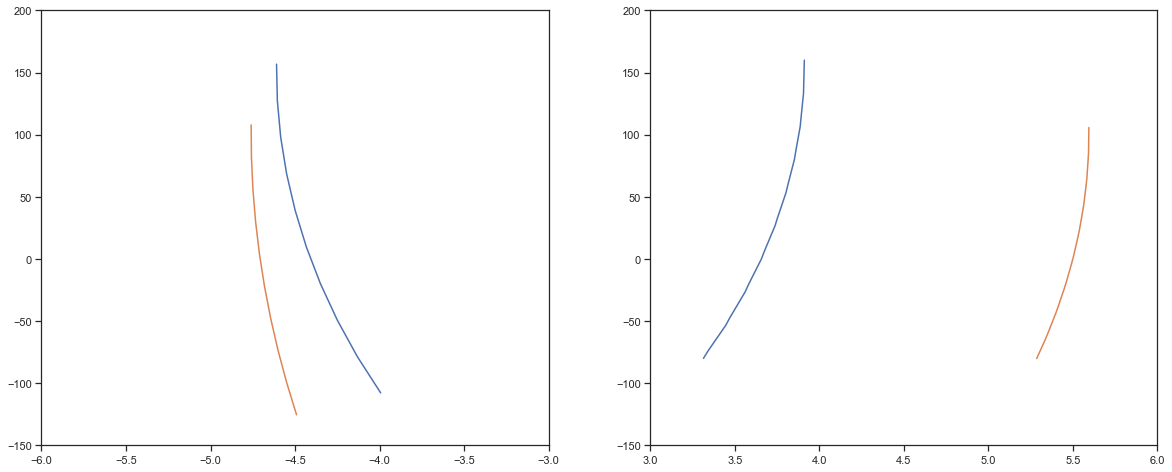

In [668]:
sns.set_theme(style="ticks")
fig, ax = plt.subplots(1, 2, figsize=(20,8))

ax[0].plot(VelHFL['velocity:0'], VelHFL['Points:2'], label="")
ax[0].plot(VelLFL['velocity:0'], VelLFL['Points:2'])
ax[1].plot(VelHFR['velocity:0'], VelHFR['Points:2'])
ax[1].plot(VelLFR['velocity:0'], VelLFR['Points:2'])


ax[0].set_xlim(-6, -3)
ax[0].set_ylim(-150, 200)
ax[1].set_xlim(3, 6)
ax[1].set_ylim(-150, 200)



##### 